In [233]:
#file Locations
trainTxtLocation = "/Users/pranav/Desktop/CS584/HW4/TrainIris.txt"
testTxtLocation ="/Users/pranav/Desktop/CS584/HW4/iris_new_data.txt"
outputTxtLocation="/Users/pranav/Desktop/CS584/HW4/outputIris.txt"

In [234]:
import numpy
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [235]:
k = numpy.loadtxt(testTxtLocation, delimiter=' ')

In [236]:
k

array([[5.7, 4.4, 1.5, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.7, 3.8, 6.7, 2.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.8, 1.9, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.4, 1.9, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.6, 3

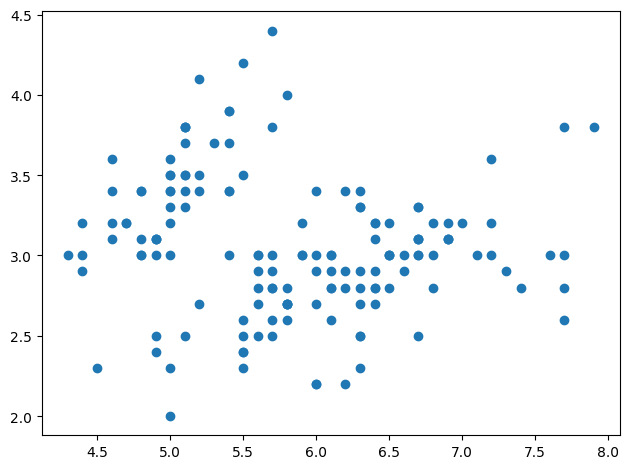

In [237]:
plt.scatter(k[:,0],k[:,1])

## Normalization of Data

In [238]:
k = Normalizer().fit(k).transform(k) 

## Reducing Dimensionality by tSNE

In [239]:
tSNE = TSNE(n_components=2,n_iter=856)
data = tSNE.fit_transform(k)
data = MinMaxScaler(feature_range=(0,1)).fit_transform(data)

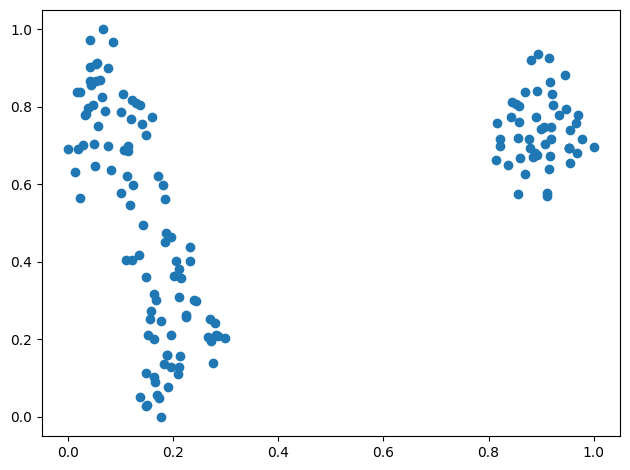

In [240]:
plt.scatter( data[:,0], data[:,1])

## Applying K-Mean Algorithm

In [241]:
def randomK(data,k,random):
    for i in range(k):
        indices = numpy.random.randint(0, data.shape[0], size=data.shape[1])
        random.append(indices)
    return random

In [242]:
def buildCentroid(data,build_centroid,currentCentroid):
    for j in range(len(currentCentroid)):
        build_centroid.append(data[currentCentroid[j],j])
    return build_centroid

In [243]:
def assignCentroid(centroed,random,data):
    for i in range(len(random)):
        currentCentroid = random[i]
        buildCentroidArray = []
        buildCentroidArray = buildCentroid(data,buildCentroidArray,currentCentroid)
        centroed.append(buildCentroidArray)
    return centroed

In [244]:
def getCentroid(data, k):
    random = []
    centroed = []
    random=randomK(data,k,random)
    centroed=assignCentroid(centroed,random,data)
    centroids=numpy.array(centroed)
    return centroids

In [245]:
def initializeClustersArray(size,clustersArray):
    for i in range(size):
            clustersArray[i] = []
    return clustersArray

In [246]:
def appendClusterWithData(assignClstr,clustersArray,dataX):
    for i in range(assignClstr.shape[0]):
        clustersArray[assignClstr[i]].append(dataX[i])
    return clustersArray

In [247]:
def restartCondition(size,clustersArray,data,restart,centroids):
    for i in range(size):
        if len(clustersArray[i]) == 0:
            centroids = getCentroid(data, size)
            restart = True
    return centroids,restart

In [248]:
def determineMean(clustersArray,index):
    temArr=numpy.array(clustersArray[index])
    mean=numpy.mean(temArr ,axis=0)
    return mean

In [249]:
def appendClusterWithMean(size,centroid_of_cluster,clustersArray):
    for i in range(size):
        centroid_of_cluster.append(determineMean(clustersArray,i))
    return centroid_of_cluster

In [250]:
def runKmeanClustering(size, dataX, centroids):
    iterCount = 0
    while True:
        iterCount = iterCount+1
        dist = euclidean_distances(dataX, centroids)
        restart = False
        clustersArray = {}
        finalcentroidCluster = []
        assignClstr  = numpy.argmin(dist, axis=1)
        clustersArray = initializeClustersArray(size,clustersArray)
        clustersArray = appendClusterWithData(assignClstr,clustersArray,dataX)
        centroids,restart=restartCondition(size,clustersArray,data,restart,centroids)
        if restart:
            continue
        finalcentroidCluster=appendClusterWithMean(size,finalcentroidCluster,clustersArray)
        if numpy.array_equal(finalcentroidCluster, centroids):
            return centroids, assignClstr
        else:
            centroids = numpy.array(finalcentroidCluster)

In [251]:
def reshapeReq(arr):
    return arr.reshape(1,-1)

In [252]:
def calculateSumOfSquareDistance(assignClstr,centroid,ssdistance,data):
    length=assignClstr.shape[0]
    for i in range(length):
        di = euclidean_distances(reshapeReq(data[i]), reshapeReq(centroid[assignClstr[i]]))
        ssdistance += (di*di)
    return ssdistance

In [253]:
def calculateInertia(data, centroid, assignClstr):
    ssdistance = 0
    centroid = numpy.array(centroid)
    assignClstr = numpy.array(assignClstr)
    ssdistance = calculateSumOfSquareDistance(assignClstr,centroid,ssdistance,data)
    return ssdistance

In [254]:
def minInertia(intertiaSelected):
    return numpy.argmin(intertiaSelected)

In [255]:
def selectClusterAndInertia(clusterandInertia,clustersSelected,intertiaSelected,num_iteration,k,train_data):
    for i in range(num_iteration):
        k_centroids, assigned_cluster = runKmeanClustering(k, train_data, getCentroid(train_data,k))
        clustersSelected.append(assigned_cluster)
        intertiaSelected.append(calculateInertia(train_data,k_centroids,assigned_cluster))
    return clusterandInertia,intertiaSelected

In [256]:
def runKmeans(train_data, clusters, num_iteration):
    clusterandInertia = []
    processingCluster = []
    
    
    for cluster in clusters:
        processingCluster.append(cluster)
    
    for k in processingCluster:
        clustersSelected =[]
        intertiaSelected = []
        print("processing cluster of size(k)=", k)
        clusterandInertia,intertiaSelected=selectClusterAndInertia(clusterandInertia,clustersSelected,intertiaSelected,num_iteration,k,train_data)
        index = minInertia(intertiaSelected)
        clusterandInertia.append((clustersSelected[index], intertiaSelected[index]))

    return clusterandInertia

In [257]:
clusters=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
selectedCluster = runKmeans(data,clusters,10)

processing cluster of size(k)= 1
processing cluster of size(k)= 2
processing cluster of size(k)= 3
processing cluster of size(k)= 4
processing cluster of size(k)= 5
processing cluster of size(k)= 6
processing cluster of size(k)= 7
processing cluster of size(k)= 8
processing cluster of size(k)= 9
processing cluster of size(k)= 10
processing cluster of size(k)= 11
processing cluster of size(k)= 12
processing cluster of size(k)= 13
processing cluster of size(k)= 14
processing cluster of size(k)= 15
processing cluster of size(k)= 16
processing cluster of size(k)= 17
processing cluster of size(k)= 18
processing cluster of size(k)= 19
processing cluster of size(k)= 20


## Calculating Silhouette Score

In [258]:
#cannot calculate silhouette_score for cluster of label 1
resultIndex=1
max=0
for i in range(1,20):
    silSc=silhouette_score(data, selectedCluster[i][0])
    if(max<silSc):
        resultIndex=i
        max=silSc
    print("silhouette_score of cluster : ", i+1," = ",silSc)

silhouette_score of cluster :  2  =  0.67747307
silhouette_score of cluster :  3  =  0.73029447
silhouette_score of cluster :  4  =  0.64676136
silhouette_score of cluster :  5  =  0.60551053
silhouette_score of cluster :  6  =  0.45558435
silhouette_score of cluster :  7  =  0.41659245
silhouette_score of cluster :  8  =  0.42607003
silhouette_score of cluster :  9  =  0.37446356
silhouette_score of cluster :  10  =  0.4047287
silhouette_score of cluster :  11  =  0.36963394
silhouette_score of cluster :  12  =  0.397364
silhouette_score of cluster :  13  =  0.38756698
silhouette_score of cluster :  14  =  0.40249124
silhouette_score of cluster :  15  =  0.36125025
silhouette_score of cluster :  16  =  0.38205436
silhouette_score of cluster :  17  =  0.38874692
silhouette_score of cluster :  18  =  0.38922715
silhouette_score of cluster :  19  =  0.37334678
silhouette_score of cluster :  20  =  0.4004512


In [259]:
print("cluster selected = ",resultIndex+1)

cluster selected =  3


In [260]:
inertia = []
for i in range(0,20):
    inertia.append(selectedCluster[i][1][0][0])

## Graph

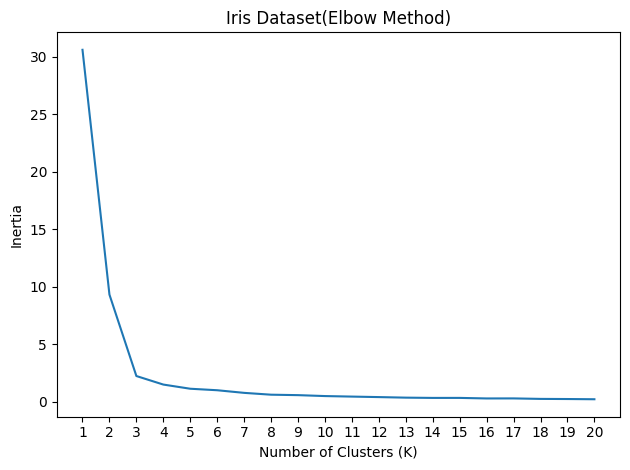

In [261]:
plt.rcParams["figure.autolayout"] = True
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = inertia
X = range(len(x))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Iris Dataset(Elbow Method)')
plt.plot(X, y)
plt.xticks(X, x)
plt.show()


In [262]:
silhouetteMetric = []

for i in range(1,20):
    silhouetteMetric.append(silhouette_score(data, selectedCluster[i][0]))

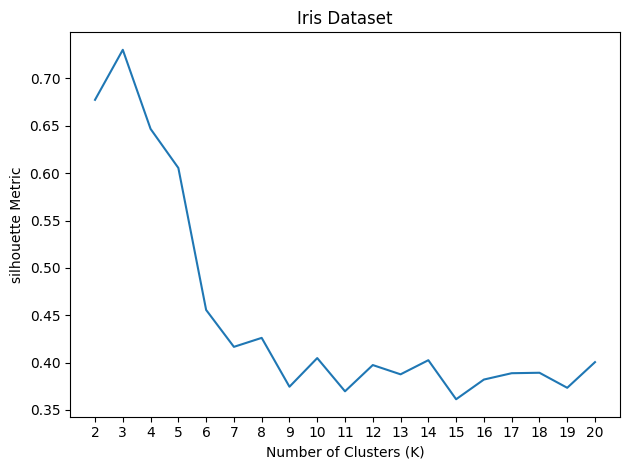

In [263]:
plt.rcParams["figure.autolayout"] = True
x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = silhouetteMetric
X = range(len(x))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('silhouette Metric')
plt.title('Iris Dataset')
plt.plot(X, y)
plt.xticks(X, x)
plt.show()

In [264]:
choosen_cluster = selectedCluster[resultIndex][0]

In [265]:
selectedCluster[resultIndex][0]

array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0])

In [266]:
y=selectedCluster[resultIndex][0]
y=y+1

In [267]:
y

array([3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 3, 3, 2, 2,
       2, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1])

## Writing output to the file

In [268]:
#write file
with open(outputTxtLocation, 'w') as outputFile:
    for i in y:
        outputFile.write(str(i)+'\n')
print("Execution finished")

Execution finished


# Code to plot graph for cluster k (from 2 to 20) vs internal evaluation matric

In [269]:
clusters=[2,4,6,8,10,12,14,16,18,20]
selectedCluster = runKmeans(data,clusters,10)

processing cluster of size(k)= 2
processing cluster of size(k)= 4
processing cluster of size(k)= 6
processing cluster of size(k)= 8
processing cluster of size(k)= 10
processing cluster of size(k)= 12
processing cluster of size(k)= 14
processing cluster of size(k)= 16
processing cluster of size(k)= 18
processing cluster of size(k)= 20


In [270]:
inertia = []

for i in range(0,10):
    inertia.append(selectedCluster[i][1][0][0])

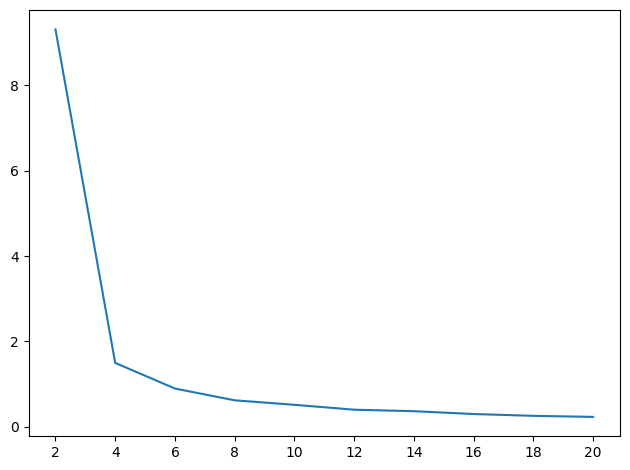

In [271]:
plt.rcParams["figure.autolayout"] = True
x = [2,4,6,8,10,12,14,16,18,20]
y = inertia
X = range(len(x))
plt.plot(X, y)
plt.xticks(X, x)
plt.show()


In [272]:
silhouetteMetric = []
for i in range(0,10):
    silhouetteMetric.append(silhouette_score(data, selectedCluster[i][0]))


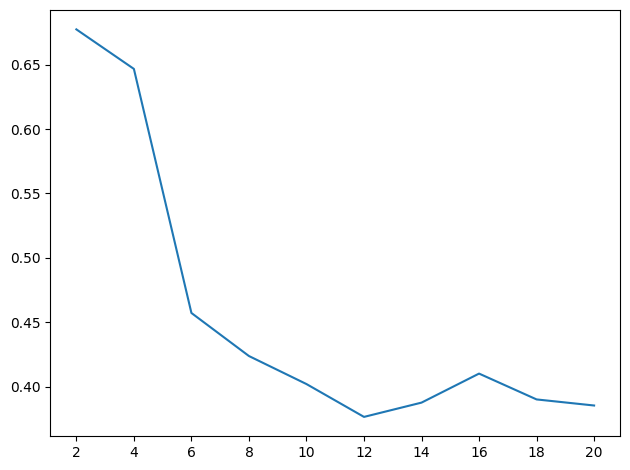

In [273]:
plt.rcParams["figure.autolayout"] = True
x = [2,4,6,8,10,12,14,16,18,20]
y = silhouetteMetric
X = range(len(x))
plt.plot(X, y)
plt.xticks(X, x)
plt.show()